In [7]:
import sys
sys.path.append("/home/graeme/")
sys.path.append('/home/graeme/GBEnergyDataManager/GBEnergyDataManager')

In [19]:
import psycopg2
import pandas as pd
import datetime as dt
import gzip
import numpy as np
import pytz
import math
#from GBEnergyDataManager.BMRA.management.commands import _upload_functions as uf
#from GBEnergyDataManager.BMRA.management.commands import _download_functions as df
from settings import DATABASES
import plotly.offline as py
import plotly.graph_objs as go
import plotly.io as pio
py.init_notebook_mode(connected=True)

In [93]:
ts_start = dt.datetime(2016, 5, 9)


In [94]:
conn = psycopg2.connect("dbname='ElexonData' user={} host={} password={}".format(DATABASES['default']['USER'],
                                                                                DATABASES['default']['HOST'],
                                                                                DATABASES['default']['PASSWORD']))
cur = conn.cursor()

In [95]:
fuelhh_query = 'SELECT sp, ft_id as fueltype, fg \
FROM public.bmra_fuelhh \
where sd=\'{}-{:02d}-{:02d}\' \
order by sd, sp, ft_id;'.format(ts_start.year,
                              ts_start.month,
                              ts_start.day)

sql_df = pd.read_sql(fuelhh_query, conn)
sql_df['time'] = [ts_start+dt.timedelta(minutes=x*30) for x in sql_df['sp']]
sql_df

,sp,fueltype,fg,time
0,1,CCGT,6269.0,2016-05-09 00:30:00
1,1,COAL,390.0,2016-05-09 00:30:00
2,1,INTEW,272.0,2016-05-09 00:30:00
3,1,INTFR,1704.0,2016-05-09 00:30:00
4,1,INTIRL,198.0,2016-05-09 00:30:00
5,1,INTNED,854.0,2016-05-09 00:30:00
6,1,NPSHYD,152.0,2016-05-09 00:30:00
7,1,NUCLEAR,6675.0,2016-05-09 00:30:00
8,1,OCGT,5.0,2016-05-09 00:30:00
9,1,OIL,0.0,2016-05-09 00:30:00


In [96]:
sql_pivot = sql_df.pivot(index='time', columns='fueltype', values='fg')
sql_pivot

fueltype,CCGT,COAL,INTEW,INTFR,INTIRL,INTNED,NPSHYD,NUCLEAR,OCGT,OIL,OTHER,PS,WIND
time,,,,,,,,,,,,,
2016-05-09 00:30:00,6269.0,390.0,272.0,1704.0,198.0,854.0,152.0,6675.0,5.0,0.0,1968.0,-586.0,3402.0
2016-05-09 01:00:00,6236.0,353.0,284.0,1704.0,198.0,824.0,149.0,6680.0,5.0,0.0,2031.0,-1036.0,3250.0
2016-05-09 01:30:00,6483.0,354.0,284.0,1704.0,198.0,840.0,135.0,6675.0,5.0,0.0,2008.0,-1306.0,3183.0
2016-05-09 02:00:00,6589.0,354.0,284.0,1704.0,198.0,812.0,135.0,6683.0,5.0,0.0,2034.0,-1246.0,3139.0
2016-05-09 02:30:00,6377.0,351.0,284.0,1706.0,198.0,812.0,136.0,6697.0,5.0,0.0,2053.0,-1376.0,3163.0
2016-05-09 03:00:00,6398.0,345.0,284.0,1706.0,198.0,808.0,136.0,6708.0,5.0,0.0,1974.0,-1550.0,3087.0
2016-05-09 03:30:00,6419.0,350.0,284.0,1706.0,198.0,818.0,137.0,6726.0,5.0,0.0,1892.0,-1658.0,3101.0
2016-05-09 04:00:00,6557.0,308.0,284.0,1704.0,190.0,798.0,137.0,6736.0,5.0,0.0,1816.0,-1710.0,3092.0
2016-05-09 04:30:00,6711.0,319.0,284.0,1706.0,136.0,842.0,137.0,6732.0,5.0,0.0,1834.0,-1780.0,2985.0


In [68]:
sql_pivot.iloc[20] = sql_pivot.iloc[19]
sql_pivot.iloc[21] = sql_pivot.iloc[19]

In [97]:
sql_pivot.columns

Index(['CCGT', 'COAL', 'INTEW', 'INTFR', 'INTIRL', 'INTNED', 'NPSHYD',
       'NUCLEAR', 'OCGT', 'OIL', 'OTHER', 'PS', 'WIND'],
      dtype='object', name='fueltype')

In [98]:
demand_query = 'SELECT sd, sp, vd as demand \
FROM public.bmra_indo \
where sd=\'{}-{:02d}-{:02d}\' \
order by sd, sp, vd;'.format(ts_start.year,
                              ts_start.month,
                              ts_start.day)
demand_df = pd.read_sql(demand_query, conn)
demand_df['time'] = [ts_start+dt.timedelta(minutes=x*30) for x in demand_df['sp']]
demand_pivot = demand_df.set_index('time')[['demand']]

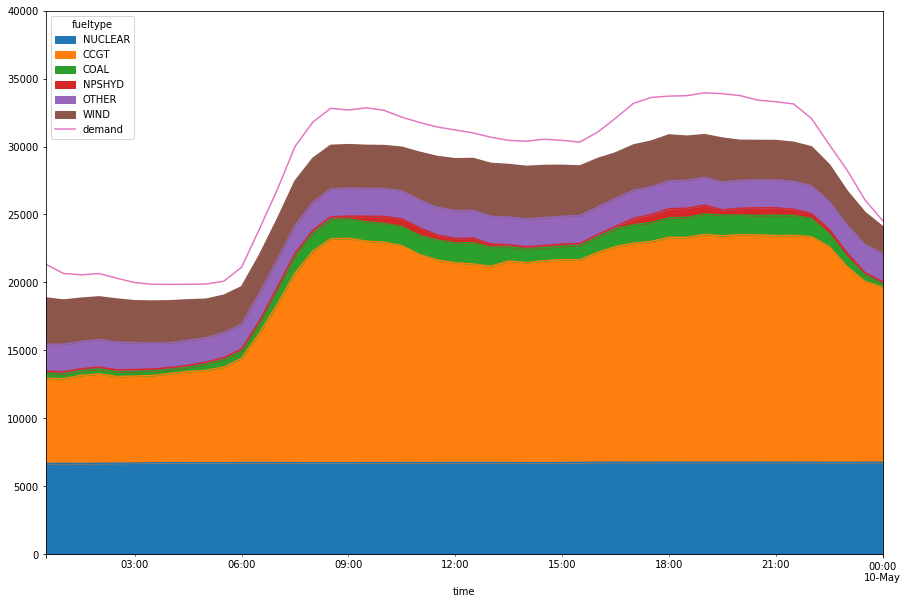

In [99]:
ax = sql_pivot[['NUCLEAR', 'CCGT', 'COAL', 'NPSHYD', 'OTHER', 'WIND']].plot.area(figsize=(15,10))
ax.set_ylim(0,40000)
demand_pivot.plot(ax=ax)

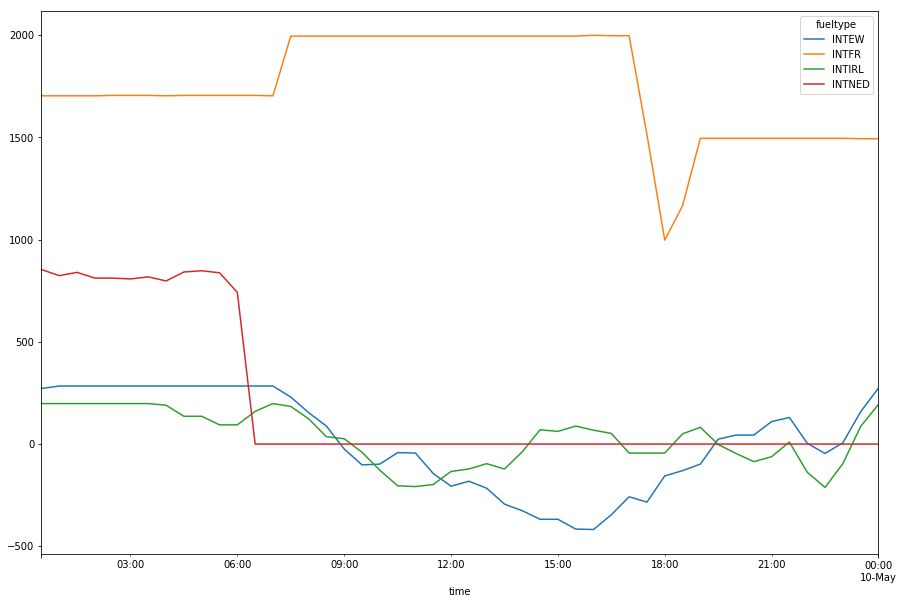

In [100]:
inter_df = sql_pivot[['INTEW', 'INTFR', 'INTIRL', 'INTNED']]
inter_df.plot(figsize=(15,10))